Last updated: November 25, 2024

Recommended to open in Colab due to the amount of interactive maps.

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iris-lew/projects/blob/main/project_005_IdentifyingBadData/identifying_bad_datasets.ipynb)

# Investigating Bad Datasets

A model is only as good as the dataset it is trained on. If it is trained on bad data, the model will be useless. It is difficult to tell when a dataset is good or bad, and thus it is important to think critically about what information the dataset can provide, and what it cannot. Just because someone says that the dataset is good and can do something, does not necesssarily mean that it is capable of doing so.

Even when we think we are using good data, we might not actually be. For example, [COMPAS was a tool that was trying to predict recidivism, but instead it was predicting race](https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm). There are ways to get around this problem (such as adversarial training in the case of COMPAS), but it must be first recognized as a problem.

Subject matter experts are a great help in identifying what data is good or bad for a particular topic, but there are cases when an average person should be able to sift through the data and reason out for themselves whether the data is good enough for the model they want to create. This is particularly necessary when working with public datasets and people are allowed to do what they please with the data. These are just some of the websites which have publicly accessible datasets and are a great place to start projects:

* https://www.kaggle.com/datasets
* https://catalog.data.gov/dataset
* https://paperswithcode.com/datasets
* https://data.world/
* https://datahub.io/collections
* https://archive.ics.uci.edu/datasets
* https://www.earthdata.nasa.gov/learn/find-data
* https://apps.who.int/gho/data/node.home
* https://www.tableau.com/learn/articles/free-public-data-sets
* https://research.google/resources/datasets/
* https://www.nature.com/sdata/

Since there are so many, if there is a particular topic you want to use, it might be easier to use a search engine.
* https://datasetsearch.research.google.com/

After finding a dataset, we need to make sense of the data. That is when **documentation** becomes important. This is especially true when it comes to parametric models (think of parametric models as math functions) where it is possible to plug numbers in and a result is computed. It may not make sense, but the function does not care.

Take the following column for example. What do you assume the numbers mean?

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
d = {'DayOfWeek': [1,3,4,2,5,4,3,2,1,7]}
pd.DataFrame(data = d)

,DayOfWeek
0,1
1,3
2,4
3,2
4,5
5,4
6,3
7,2
8,1
9,7


Does the day of the week start on Sunday or Monday? It would be reasonable to assume it starts on either Sunday or Monday, but it is still ambiguous. This would have potential implications on the analysis.

I would also have to ensure that the days of the week are treated as categorical values rather than numerical values in the analysis. This means that I cannot treat the column as numbers but as "names". I added in a profits column and then put the data frame through a `describe` function. This shows summary statistics for all columns in the dataframe. It makes sense to calculate the average profit (money is numerical), but it still performs the math operations on the Day of the Week column even though it makes no sense to calculate the mean of "Sunday, Monday, Tuesday, Wednesday, Thursday, Friday, and Saturday."

In [ ]:
d2 = {'DayOfWeek': [1,3,4,2,5,4,3,2,1,7],
     'Profit': [100,4453,554,5552,45665,474,13,2036,11,78]}
df2 = pd.DataFrame(data = d2)
df2.describe()

,DayOfWeek,Profit
count,10.000000,10.000000
mean,3.200000,5893.600000
std,1.873796,14115.768135
min,1.000000,11.000000
25%,2.000000,83.500000
50%,3.000000,514.000000
75%,4.000000,3848.750000
max,7.000000,45665.000000


**Humans ascribe meaning to the data.** Computers are fancy calculators and are optimized to perform calculations, but cannot interpret it.

## How to Identify Bad Data?

One way is to peruse the dataset and look at the descriptions and data content. If it lacks description or if the description doesn't make sense, even if the model good at its tasks (e.g., 90%+ accuracy), it may be meaningless.

Another way is to examine the model performance to see if it is performing as expected. If we have information on the data source, but the model doesn't perform as expected, then we can gain insight based on the model despite its lackluster performance.

### Bad Data from Descriptions

If there is little to no documentation on how the data is collected, then it is likely to be unusable. It requires a little bit of detective work and careful reading, but it is important to know what we are working with.

In the following example, I will be using two datasets about wildfires, both of which are from Kaggle.


*   https://www.kaggle.com/datasets/abdelghaniaaba/wildfire-prediction-dataset
*   https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires



The first dataset states that it contains images that classified as "wildfire" or "no wildfire." This is sourced from Canada's "Forest Fires - Open Government Portal." We can click on the [link](https://open.canada.ca/data/en/dataset/9d8f219c-4df0-4481-926f-8a2a532ca003) in Kaggle and see that it contains mapping of forest fires of Southern Quebec. The maps shows the contours of the fire, some which date back to 1972. It appears as if there good documentation, but it raises questions when paired with the Kaggle dataset.

![Canada Wildfire Kaggle](Canada_Wildfires_kaggle.jpg)

![Canada Wildfire Gov Descriptions](Canada_Wildfires_gov_website.jpg)

The data from the Canadian government portal contains maps, more specifically, the maps are in the FGDB/GDB format, which is a file geodatabase. This is not the .jpg images that the Kaggle dataset contains.

The Kaggle dataset contains .jpg images with the central coordinate located in the file name. This means that the dataset was created with something else, and as the Kaggle documentation says: [MapBox API](https://docs.mapbox.com/api/overview/). They look to be created with the [Satellite Streets](https://www.mapbox.com/maps/satellite) style of MapBox. When we look at the documentation, we don't see when these images were taken or from which satelllite. The fires in the Canada dataset can be dated back to 1972, but we don't know whether these images of Canada were taken in the 1950s, 2010s, or even 2020s. There is no guarantee that an area will always look the same from year to year.

A general problem that satellites run into is cloud cover. With the technology that is currently available, it is difficult to visually perceive land past clouds. The MapBox API images do not have cloud cover, so this calls into question how these images were generated.

There's also the fact that fire is not contained within a square. Wildfires can be large, and can encompass many acres. How many images were generated per wildfire? Did the image encapsulate the entire wildfire or was there an area within the image where the wildfire did not capture? Are there some areas that burned more than once and was only counted once? Athere that some fires that are counted multiple times? Should all wildfires be treated the same regardless of their size and severity? How were the "non-wildfire" locations chosen? Were the "non-wildfire" locations chosen by a random coordinate generator?

In [ ]:
### only used for Google Colab
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/MyDrive/

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from PIL import Image, ImageFile
# from PIL import Image, ImageEnhance

import folium
from IPython.display import HTML
from folium.plugins import HeatMap

import cv2
from skimage.feature import local_binary_pattern
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow

import random

import pickle

In [ ]:
# Global variable settings
random.seed(0)
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
### Downloaded and extracted Kaggle images into this directory.
%cd Canada
%ls

/content/gdrive/MyDrive/Canada
can_1000urbanlab.csv  Canada.shx                    df_train_deduped_urban8.csv
can_3000urbanlab.csv  canada_urban_model.sav        df_train_deduped_urban9.csv
Canada_core.cpg       canada_wildfire_model.sav     df_train_deduped_urban.csv
Canada_core.dbf       df_train_deduped_urban10.csv  df_validation_deduped.csv
Canada_core.prj       df_train_deduped_urban1.csv   df_validation_deduped_urban.csv
Canada_core.shp       df_train_deduped_urban2.csv   df_validation_deduped_urban_prediction.csv
Canada_core.shx       df_train_deduped_urban3.csv   test/
Canada.cpg            df_train_deduped_urban4.csv   train/
Canada.dbf            df_train_deduped_urban5.csv   valid/
Canada.prj            df_train_deduped_urban6.csv
Canada.shp            df_train_deduped_urban7.csv


In [ ]:
# train
lists = []

status = ["nowildfire","wildfire"]

for state in status:
  for filename in os.listdir("./train/"+state):
    temp = []
    temp.append('./train/'+state+'/'+filename)
    temp.append(filename[:filename.index(',')])
    temp.append(filename[filename.index(',')+1:filename.index('.jpg')])
    temp.append(state)
    lists.append(temp)

df_train = pd.DataFrame(lists, columns=["file_name","latitude","longitude","wildfire_status"])
df_train

,file_name,latitude,longitude,wildfire_status
0,"./train/nowildfire/-79.535187,43.882733.jpg",-79.535187,43.882733,nowildfire
1,"./train/nowildfire/-79.533182,43.784243.jpg",-79.533182,43.784243,nowildfire
2,"./train/nowildfire/-79.534956,43.647635.jpg",-79.534956,43.647635,nowildfire
3,"./train/nowildfire/-79.536092,43.633224.jpg",-79.536092,43.633224,nowildfire
4,"./train/nowildfire/-79.531656,43.704536.jpg",-79.531656,43.704536,nowildfire
...,...,...,...,...
30265,"./train/wildfire/-66.73731,50.35672.jpg",-66.73731,50.35672,wildfire
30266,"./train/wildfire/-66.75804,48.01979.jpg",-66.75804,48.01979,wildfire
30267,"./train/wildfire/-66.7444,50.05576.jpg",-66.7444,50.05576,wildfire
30268,"./train/wildfire/-66.72849,48.01978.jpg",-66.72849,48.01978,wildfire


In [ ]:
# validation
lists = []

status = ["nowildfire","wildfire"]
for state in status:
  for filename in os.listdir("./valid/"+state):
    temp = []
    temp.append('./valid/'+state+'/'+filename)
    temp.append(filename[:filename.index(',')])
    temp.append(filename[filename.index(',')+1:filename.index('.jpg')])
    temp.append(state)
    lists.append(temp)

df_validation = pd.DataFrame(lists, columns=["file_name","latitude","longitude","wildfire_status"])
df_validation

,file_name,latitude,longitude,wildfire_status
0,"./valid/nowildfire/-73.910371,45.429903.jpg",-73.910371,45.429903,nowildfire
1,"./valid/nowildfire/-73.906629,45.631967.jpg",-73.906629,45.631967,nowildfire
2,"./valid/nowildfire/-75.566836,45.460096.jpg",-75.566836,45.460096,nowildfire
3,"./valid/nowildfire/-75.568926,45.437194.jpg",-75.568926,45.437194,nowildfire
4,"./valid/nowildfire/-73.918042,45.568354.jpg",-73.918042,45.568354,nowildfire
...,...,...,...,...
6295,"./valid/wildfire/-70.05913,48.03148.jpg",-70.05913,48.03148,wildfire
6296,"./valid/wildfire/-70.12939,49.35492.jpg",-70.12939,49.35492,wildfire
6297,"./valid/wildfire/-70.0567,52.6694.jpg",-70.0567,52.6694,wildfire
6298,"./valid/wildfire/-70.03096,46.61391.jpg",-70.03096,46.61391,wildfire


In [ ]:
# test
lists = []

status = ["nowildfire","wildfire"]
for state in status:
  for filename in os.listdir("./test/"+state):
    temp = []
    temp.append('./test/'+state+'/'+filename)
    temp.append(filename[:filename.index(',')])
    temp.append(filename[filename.index(',')+1:filename.index('.jpg')])
    temp.append(state)
    lists.append(temp)

df_test = pd.DataFrame(lists, columns=["file_name","longitude","latitude","wildfire_status"])
df_test

,file_name,longitude,latitude,wildfire_status
0,"./test/nowildfire/-75.591351,45.397808.jpg",-75.591351,45.397808,nowildfire
1,"./test/nowildfire/-75.582705,45.455013.jpg",-75.582705,45.455013,nowildfire
2,"./test/nowildfire/-75.576579,45.426425.jpg",-75.576579,45.426425,nowildfire
3,"./test/nowildfire/-75.572866,45.43287.jpg",-75.572866,45.43287,nowildfire
4,"./test/nowildfire/-75.586328,45.462467.jpg",-75.586328,45.462467,nowildfire
...,...,...,...,...
6295,"./test/wildfire/-70.04461,49.43645.jpg",-70.04461,49.43645,wildfire
6296,"./test/wildfire/-70.1365,50.839.jpg",-70.1365,50.839,wildfire
6297,"./test/wildfire/-70.37538,47.52518.jpg",-70.37538,47.52518,wildfire
6298,"./test/wildfire/-70.33803,47.56565.jpg",-70.33803,47.56565,wildfire


In [ ]:
print(f'total: {30270+6300+6300}')
print(f'train proportion: {30270/(30270+6300+6300)}')
print(f'valid and test proportions: {6300/(30270+6300+6300)}')

total: 42870
train proportion: 0.7060881735479356
valid and test proportions: 0.1469559132260322


In [ ]:
df_train.wildfire_status.value_counts()

,count
wildfire_status,
wildfire,15770
nowildfire,14500


In [ ]:
15770/(15770+14500)

0.5209778658738025

In [ ]:
df_validation.wildfire_status.value_counts()

,count
wildfire_status,
wildfire,3480
nowildfire,2820


In [ ]:
3480/(3480+2820)

0.5523809523809524

The data is already split up in its training, validation, and test sets. Traditionally, the data is split into the training and test set first. Data exploration is done on the training set, and then the training set is further split into a training and validation set. The validation set exists so the models can be fine-tuned. The test set exists just to give a final evaluation of model performance.

The dataset is split up 71% in the training dataset, 15% in the validation dataset, and 15% in the test dataset, which is standard. There is also a roughly even split of wildfire and no wildfire images in both the training and validation set. As the dataset is already split up into the three sets and I am not fine-tuning the model, I will be treating the validation set as the test set for the analysis.

For data exploration, because I only have latitude, longitude, and the images to work with, I'd first display the images and plot them on a map.

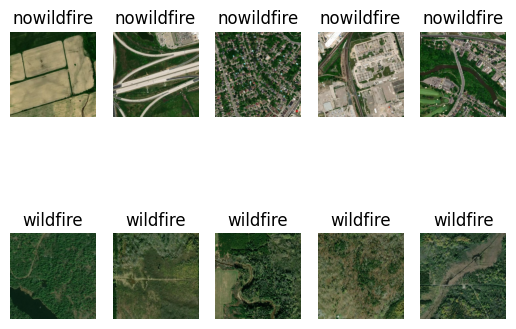

In [ ]:
# display the images

figure, axis = plt.subplots(2, 5)

status = ["nowildfire","wildfire"]

for j in range(2):
  for i in range(5):
    file_name = df_train[df_train["wildfire_status"]==status[j]]["file_name"].iloc[i]
    img = mpimg.imread(file_name)
    axis[j, i].imshow(img)
    axis[j, i].set_title(status[j])
    axis[j, i].axis('off')

plt.show()


I see that there's a very different image for those that are labeled as "no wildfire" and those that are labeled as wildfire images. There's buildings and roads amongst the "no wildfire" images, and this leads me to suspect that "no wildfire" images are of urban or suburban areas.

In [ ]:
df_train["latitude_numeric"]=pd.to_numeric(df_train["latitude"])
#df_train["longitude_numeric"]=pd.to_numeric(df_train["longitude"]) # This throws error
df_train[df_train["longitude"].str.endswith("(1)")] # Check the error.

,file_name,latitude,longitude,wildfire_status,latitude_numeric
29237,"./train/wildfire/-69.08909,48.64359 (1).jpg",-69.08909,48.64359 (1),wildfire,-69.08909
29239,"./train/wildfire/-69.09138,48.92926 (1).jpg",-69.09138,48.92926 (1),wildfire,-69.09138
29244,"./train/wildfire/-69.08628,48.69455 (1).jpg",-69.08628,48.69455 (1),wildfire,-69.08628
29247,"./train/wildfire/-69.08571,49.04856 (1).jpg",-69.08571,49.04856 (1),wildfire,-69.08571
29248,"./train/wildfire/-69.09862,48.63729 (1).jpg",-69.09862,48.63729 (1),wildfire,-69.09862
29249,"./train/wildfire/-69.08884,48.80216 (1).jpg",-69.08884,48.80216 (1),wildfire,-69.08884
29255,"./train/wildfire/-69.09579,48.71613 (1).jpg",-69.09579,48.71613 (1),wildfire,-69.09579
29256,"./train/wildfire/-69.09651,48.19634 (1).jpg",-69.09651,48.19634 (1),wildfire,-69.09651
29257,"./train/wildfire/-69.08501,48.63999 (1).jpg",-69.08501,48.63999 (1),wildfire,-69.08501
29261,"./train/wildfire/-69.09777,51.20264 (1).jpg",-69.09777,51.20264 (1),wildfire,-69.09777


There are 20 instances where the longitude contains a "(1)". I suspect that they are duplicates to the data because when the same file name is found in a folder, a "(1)" is automatically added towards the end of the file name to make it unique. This means I would need to remove the (1) and then de-dupe.

In [ ]:
# de-dupe

df_train["longitude_numeric"] = np.where(df_train["longitude"].str.endswith("(1)"),df_train["longitude"].str.replace(" (1)",""),df_train["longitude"])
df_train["longitude_numeric"] = pd.to_numeric(df_train["longitude_numeric"])

df_train_deduped = df_train.drop_duplicates(subset=["wildfire_status","latitude_numeric","longitude_numeric"], keep="last")
df_train_deduped

,file_name,latitude,longitude,wildfire_status,latitude_numeric,longitude_numeric
0,"./train/nowildfire/-79.535187,43.882733.jpg",-79.535187,43.882733,nowildfire,-79.535187,43.882733
1,"./train/nowildfire/-79.533182,43.784243.jpg",-79.533182,43.784243,nowildfire,-79.533182,43.784243
2,"./train/nowildfire/-79.534956,43.647635.jpg",-79.534956,43.647635,nowildfire,-79.534956,43.647635
3,"./train/nowildfire/-79.536092,43.633224.jpg",-79.536092,43.633224,nowildfire,-79.536092,43.633224
4,"./train/nowildfire/-79.531656,43.704536.jpg",-79.531656,43.704536,nowildfire,-79.531656,43.704536
...,...,...,...,...,...,...
30265,"./train/wildfire/-66.73731,50.35672.jpg",-66.73731,50.35672,wildfire,-66.737310,50.356720
30266,"./train/wildfire/-66.75804,48.01979.jpg",-66.75804,48.01979,wildfire,-66.758040,48.019790
30267,"./train/wildfire/-66.7444,50.05576.jpg",-66.7444,50.05576,wildfire,-66.744400,50.055760
30268,"./train/wildfire/-66.72849,48.01978.jpg",-66.72849,48.01978,wildfire,-66.728490,48.019780


In [ ]:
30250+20 # 30270 confirmed that only 20 dupilcates were dropped.

30270

In [ ]:
# plot them on a map

lat = df_train_deduped["latitude_numeric"]
lon = df_train_deduped["longitude_numeric"]

map = folium.Map(location=[df_train_deduped["latitude_numeric"].mean(),df_train_deduped["longitude_numeric"].mean()],
                 zoom_start=2,
                 control_scale=True)
HeatMap(list(zip(lat, lon))).add_to(map)

map

This is strange. I went forward with the assumption that the GPS coordinates are (latitude, longitude). If I moved forward with that assumption, then my coordinates place me in Antarctica when I expect to be in Canada.

In [ ]:
# Switched the latitude and longitude.

lat = df_train_deduped["longitude_numeric"]
lon = df_train_deduped["latitude_numeric"]

map = folium.Map(location=[df_train_deduped["longitude_numeric"].mean(),df_train_deduped["latitude_numeric"].mean()],
                 zoom_start=4,
                 control_scale=True)
HeatMap(list(zip(lat, lon))).add_to(map)

map

When I reverse latitude and longitude, I see that the majority of the points are now in Quebec, but there are some that are outside of Quebec. According to the Canadian government website, I should expect that the coordinates of the wildfires would be in Southeastern Quebec.

In [ ]:
# Switched the latitude and longitude, and only keep the wildfire records
df_train_deduped_wildfire = df_train_deduped[df_train_deduped["wildfire_status"]=="wildfire"]

lat = df_train_deduped_wildfire["longitude_numeric"]
lon = df_train_deduped_wildfire["latitude_numeric"]

map = folium.Map(location=[df_train_deduped_wildfire["longitude_numeric"].mean(),df_train_deduped_wildfire["latitude_numeric"].mean()],
                 zoom_start=4,
                 control_scale=True)
HeatMap(list(zip(lat, lon))).add_to(map)

map

In [ ]:
# Switched the latitude and longitude.
df_train_deduped_nowildfire = df_train_deduped[df_train_deduped["wildfire_status"]=="nowildfire"]

lat = df_train_deduped_nowildfire["longitude_numeric"]
lon = df_train_deduped_nowildfire["latitude_numeric"]

map = folium.Map(location=[df_train_deduped_nowildfire["longitude_numeric"].mean(),df_train_deduped_nowildfire["latitude_numeric"].mean()],
                 zoom_start=4,
                 control_scale=True)
HeatMap(list(zip(lat, lon))).add_to(map)

map

This becomes even stranger. The wildfire records show that there are fires all over Quebec, but the "no wildfire" images are mostly concentrated in Ottawa, Toronto, Vancouver, and Calgary. These are locations where there are higher concentration of human residence.

In summary, through a cursory data exploration, I find that the data is suspicious because:


1.   The GPS coordinates are not in the right order.
2.   The government website the wildfire data was originally sourced from stated that the database contains wildfire data from Southern Quebec, not Quebec as a whole.
3.   There is no documentation for how the "no wildfire" images are generated, and the "no wildfire" images are generally locations where humans reside, which would look very different from the wilderness where wildfires are generally found.

The Kaggle documentation was sparse, and the data itself is of poor quality given the documentation I could find and deduce.

The Kaggle documentation states

> Using Longitude and Latitude coordinates for each wildfire spot (> 0.01 acres burned) found on the dataset above we extracted satellite images of those areas using MapBox API to create a more convenient format of the dataset for deep learning and building a model that can predict whether an area is at risk of a wildfire or not

If I are unable to identify *when* the image is taken, I will be unable to accurately identify whether an area is at risk of a wildfire or not. This is because if a wildfire has just passed through an area, the flammable material is no longer available, thus drastically decreasing the chances of a wildfire occurring. If Point A has not had a wildfire in 50 years, there is 50 years of accumulated vegetation that can burn and will be at a higher risk of fire (as well as a more dangerous fire). If it has only been 5 years since the last wildfire, the chances of that exact same location having a wildfire is much less.

**Thus, as data scientists, we see that we need to be careful about trusting what other people say is possible, and think critically about the data, its sources, and what we are trying to accomplish with the data.** Even if the author believes that this dataset can create a model "that can predict whether an area is at risk of a wildfire or not," with logical reasoning about the data, this claim looks to be difficult. To prove this, I can create a model using the data provided and have high accuracy, but is likely not predicting wildfires.

> "Garbage in, garbage out"

Note: the following contains code chunks that were taken from a project I was a part of in my master's degree. It was also using this same dataset, so I took the code and modified it for this write up. Everything with the "not my original code" comment on the top of it wasn't coded by me.

In [ ]:
# do the same things to the df_validation dataframe and the df_test dataframe.
df_validation["latitude_numeric"]=pd.to_numeric(df_validation["latitude"])
df_validation["longitude_numeric"] = np.where(df_validation["longitude"].str.endswith("(1)"),
                                              df_validation["longitude"].str.replace(" (1)",""),
                                              df_validation["longitude"])
df_validation["longitude_numeric"] = pd.to_numeric(df_validation["longitude_numeric"])

df_validation_deduped = df_validation.drop_duplicates(subset=["wildfire_status","latitude_numeric","longitude_numeric"], keep="last")

# do the same things to the df_validation dataframe and the df_test dataframe.
df_test["latitude_numeric"]=pd.to_numeric(df_test["latitude"])
df_test["longitude_numeric"] = np.where(df_test["longitude"].str.endswith("(1)"),
                                        df_test["longitude"].str.replace(" (1)",""),
                                        df_test["longitude"])
df_test["longitude_numeric"] = pd.to_numeric(df_test["longitude_numeric"])

df_test_deduped = df_test.drop_duplicates(subset=["wildfire_status","latitude_numeric","longitude_numeric"], keep="last")

In [ ]:
import tensorflow as tf

In [ ]:
# not my original code
def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    return width, height

print(get_num_pixels(df_train_deduped.iloc[0,0]))
target_size = get_num_pixels(df_train_deduped.iloc[0,0])

(350, 350)


In [ ]:
# not my original code

def get_image_from_path(image_path, target_size=target_size):
    return tf.keras.preprocessing.image.img_to_array(
        tf.keras.preprocessing.image.load_img(
            path=image_path,
            color_mode="rgb",
            target_size=target_size,
        )
    )

def get_image_array_from_df(df, target_size=target_size):
    """Load image from given `image_dir` and `label` columns stored in df"""
    return np.stack(
        df.apply(
            lambda row: get_image_from_path(row["file_name"], target_size),
            axis=1,
        )
    )
def compute_channel_mean(df_train, target_size=target_size):
    num_images, height, width, channels = (
        df_train.shape[0],
        target_size[0],
        target_size[1],
        3,
    )
    min_val = None
    max_val = None
    channel_sum = np.zeros(channels)
    for i in range(num_images):
        print(df_train.iloc[i]["file_name"])
        image_array = get_image_from_path(df_train.iloc[i]["file_name"], target_size)
        # Sum all pixel values per channel
        channel_sum += np.sum(
            image_array,
            axis=(0, 1),
        )
    return channel_sum / (num_images * height * width)

def compute_image_stats(df_train, channel_mean, target_size):
    num_images, height, width, channels = (
        df_train.shape[0],
        target_size[0],
        target_size[1],
        3,
    )
    min_val = None
    max_val = None
    channel_squared_diff = 0
    for i in range(num_images):
        image_array = get_image_from_path(df_train.iloc[i]["file_name"], target_size)
        channel_squared_diff += np.sum((image_array - channel_mean) ** 2, axis=(0, 1))

        # Min/max pixel values per image
        image_array_min = np.min(image_array)
        image_array_max = np.max(image_array)
        min_val = image_array_min if min_val is None else min(min_val, image_array_min)
        max_val = image_array_max if max_val is None else max(max_val, image_array_max)
    return {
        "channel_mean": channel_mean,
        "channel_std": np.sqrt(channel_squared_diff / (num_images * height * width)),
        "min": min_val,
        "max": max_val,
        "ptp": max_val - min_val,
    }

In [ ]:
# not my original code
def extract_lbp_feature(image, radius=1, n_points=8, method="uniform"):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lbp_image = local_binary_pattern(gray_image, n_points, radius, method)
    # Calculate the histogram
    lbp_feature, _ = np.histogram(lbp_image, bins=n_points + 1, density=True)
    return lbp_feature, lbp_image

In [ ]:
# not my original code
radius = 1  # Radius of the LBP circle
n_points = radius * 8  # Number of points to sample on the LBP circle
method = "uniform"

I chose to print the filepath of the image that it is reading in so that I can verify whether the code  block is running or if Colab was timing out on me. Printing the output is optional, but it takes 2 hours and 19 minutes to run, and I'd rather scroll through the output than wait for hours only for an error to pop up.

In [ ]:
# not my original code
# 2h 19m 36s to run # 1h 45m 51s on another run
train_channel_mean = compute_channel_mean(df_train_deduped, target_size)
train_image_stats = compute_image_stats(df_train_deduped, train_channel_mean, target_size)

Streaming output truncated to the last 5000 lines.
./train/wildfire/-72.37685,45.55486.jpg
./train/wildfire/-72.37705,48.83274.jpg
./train/wildfire/-72.37565,47.17566.jpg
./train/wildfire/-72.37345,46.6337.jpg
./train/wildfire/-72.3855,45.4957.jpg
./train/wildfire/-72.3803,48.11571.jpg
./train/wildfire/-72.3828,46.7136.jpg
./train/wildfire/-72.3841,46.34143.jpg
./train/wildfire/-72.37973,54.24581.jpg
./train/wildfire/-72.3818,45.85582.jpg
./train/wildfire/-72.37545,49.10672.jpg
./train/wildfire/-72.3814,48.6956.jpg
./train/wildfire/-72.3763,45.4645.jpg
./train/wildfire/-72.38142,46.45444.jpg
./train/wildfire/-72.38448,45.68825.jpg
./train/wildfire/-72.37833,48.94544.jpg
./train/wildfire/-72.3743,48.85492.jpg
./train/wildfire/-72.39613,48.93285.jpg
./train/wildfire/-72.39431,46.84592.jpg
./train/wildfire/-72.39122,45.03058.jpg
./train/wildfire/-72.3893,46.8753.jpg
./train/wildfire/-72.38833,48.20983.jpg
./train/wildfire/-72.38806,46.24761.jpg
./train/wildfire/-72.38932,48.8711.jpg
./tra

In [ ]:
# not my original code
train_image_stats

{'channel_mean': array([75.69430631, 88.8341389 , 64.50782372]),
 'channel_std': array([49.69773855, 41.67906251, 42.81568086]),
 'min': 0.0,
 'max': 255.0,
 'ptp': 255.0}

In [ ]:
# not my original code
val_channel_mean = compute_channel_mean(df_validation_deduped, target_size)
val_image_stats = compute_image_stats(df_validation_deduped, val_channel_mean, target_size)
val_image_stats

Streaming output truncated to the last 5000 lines.
./valid/nowildfire/-123.103225,49.200668.jpg
./valid/nowildfire/-123.118672,49.235925.jpg
./valid/nowildfire/-123.114964,49.136842.jpg
./valid/nowildfire/-123.118854,49.186123.jpg
./valid/nowildfire/-123.110331,49.103238.jpg
./valid/nowildfire/-123.123447,49.137152.jpg
./valid/nowildfire/-123.104753,49.127172.jpg
./valid/nowildfire/-123.123705,49.263747.jpg
./valid/nowildfire/-123.108357,49.115824.jpg
./valid/nowildfire/-123.119445,49.114176.jpg
./valid/nowildfire/-123.115694,49.156619.jpg
./valid/nowildfire/-123.114114,49.182956.jpg
./valid/nowildfire/-123.12684,49.142038.jpg
./valid/nowildfire/-123.121018,49.10825.jpg
./valid/nowildfire/-123.126379,49.186966.jpg
./valid/nowildfire/-123.113886,49.206992.jpg
./valid/nowildfire/-123.109296,49.187393.jpg
./valid/nowildfire/-123.140382,49.150393.jpg
./valid/nowildfire/-123.134359,49.230071.jpg
./valid/nowildfire/-123.143116,49.264574.jpg
./valid/nowildfire/-123.143054,49.167184.jpg
./vali

{'channel_mean': array([75.40888971, 88.47633175, 64.0921146 ]),
 'channel_std': array([49.16407014, 41.19194232, 42.31953895]),
 'min': 0.0,
 'max': 255.0,
 'ptp': 255.0}

In [ ]:
# not my original code
X_train_mean = train_image_stats["channel_mean"]
X_train_std = train_image_stats["channel_std"]
X_train_min = train_image_stats["min"]
X_train_max = train_image_stats["max"]
X_train_ptp = train_image_stats["ptp"]

X_val_mean = val_image_stats["channel_mean"]
X_val_std = val_image_stats["channel_std"]
X_val_min = val_image_stats["min"]
X_val_max = val_image_stats["max"]
X_val_ptp = val_image_stats["ptp"]

In [ ]:
# not my original code
# 22m 9s
train_lbp_features = []
train_labels = []
for i in range(df_train_deduped.shape[0]):
    # Z-score normalization
    image_array = get_image_from_path(df_train_deduped.iloc[i]["file_name"], target_size)
    image_array_normalized = (image_array - X_train_mean) / X_train_std

    # Convert image to uint8 for OpenCV processing
    image_array_normalized_uint8 = (
        255 * (image_array_normalized - X_train_min) / X_train_ptp
    ).astype(np.uint8)

    lbp_feature, _ = extract_lbp_feature(
        image_array_normalized_uint8, radius, n_points, method
    )
    # Append feature and label
    train_lbp_features.append(lbp_feature)
    train_labels.append(df_train_deduped.iloc[i]["wildfire_status"])

train_lbp_features = np.array(train_lbp_features)
train_labels = np.array(train_labels)

print(train_lbp_features.shape)
print(train_labels.shape)

(30250, 9)
(30250,)


In [ ]:
# not my original code
val_lbp_features = []
val_labels = []
for i in range(df_validation_deduped.shape[0]):
    # Z-score normalization
    image_array = get_image_from_path(df_validation_deduped.iloc[i]["file_name"], target_size)
    image_array_normalized = (image_array - X_train_mean) / X_train_std

    # Convert image to uint8 for OpenCV processing
    image_array_normalized_uint8 = (
        255 * (image_array_normalized - X_val_min) / X_val_ptp
    ).astype(np.uint8)

    lbp_feature, _ = extract_lbp_feature(
        image_array_normalized_uint8, radius, n_points, method
    )
    # Append feature and label
    val_lbp_features.append(lbp_feature)
    val_labels.append(df_validation_deduped.iloc[i]["wildfire_status"])

val_lbp_features = np.array(val_lbp_features)
val_labels = np.array(val_labels)

print(val_lbp_features.shape)
print(val_labels.shape)

(6300, 9)
(6300,)


In [ ]:
# not my original code
nn_classifier_best = MLPClassifier(
    hidden_layer_sizes=(16, 16), max_iter=2000, random_state=0
)
nn_classifier_best.fit(train_lbp_features, train_labels)

MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=2000, random_state=0)

In [ ]:
# Save the model as a pickle. Fine to use this since I created it.
# has security vulnerabilities so it may not be best practice.
filename = 'canada_wildfire_model.sav'
pickle.dump(nn_classifier_best, open(filename, 'wb'))

In [ ]:
# not my original code
# Make predictions on the testing data
y_pred = nn_classifier_best.predict(val_lbp_features)

# Evaluate the model's performance
accuracy = accuracy_score(val_labels, y_pred)
print("Accuracy:", accuracy)

# Get the detailed classification report
class_names = nn_classifier_best.classes_  # Replace with your class names
print(classification_report(val_labels, y_pred, target_names=class_names))

Accuracy: 0.8982539682539683
              precision    recall  f1-score   support

  nowildfire       0.87      0.90      0.89      2820
    wildfire       0.92      0.89      0.91      3480

    accuracy                           0.90      6300
   macro avg       0.90      0.90      0.90      6300
weighted avg       0.90      0.90      0.90      6300



In [ ]:
df_validation_deduped["wildfire_pred"] = y_pred
df_validation_prediction = df_validation_deduped

df_validation_prediction.to_csv("df_validation_wildfire_prediction.csv", index=False)

In [ ]:
# to load the model after saving the model.
objects = []
with (open("canada_wildfire_model.sav", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
nn_classifier_best = objects[0]

This is a good result, but what if this wasn't what the model was actually predicting? As mentioned before, the "nowildfire" images are largely from areas where people reside rather than the wilderness. To test whether the images are being classified as urban (including suburban) or rural, I can add in a column which would classify whether they are urban (including suburban) or rural. This data was originally found from the Organisation for Economic Co-operation and Development, but this specific [webpage](https://www.oecd.org/cfe/regionaldevelopment/functionalurbanareasbycountry.htm) has changed from 2023 and the data which delineates where the functional urban areas of Canada are is no longer accessible. I am using a file from August 31, 2023.

In [ ]:
# ### It'll take forever to run this code due to the number of records.
# ### I ran the code once, and then saved the outputs in a CSV file.
# ### Uncomment to run the code.
# ### needs dbf for records and shp just for polygon. only need polygon

# https://www.oecd.org/cfe/regionaldevelopment/functionalurbanareasbycountry.htm ### canada

# # https://stackoverflow.com/questions/48897635/given-a-geographical-coordinate-in-u-s-how-to-find-out-if-it-is-in-urban-or-ru

import shapefile
from shapely.geometry import Point # Point class
from shapely.geometry import shape # shape() is a function to convert geo objects through the interface

def is_urban(pt, allshapes):
    result = False
    for i in range(len(allshapes)):
        boundary = allshapes[i] # get a boundary polygon
        #name = all_records[i][3] + ', ' + all_records[i][4] # get the second field of the corresponding record
        if Point(pt).within(shape(boundary)): # make a point and see if it's in the polygon
            result = True
    return result

# pt = (-97.759615,30.258773) # an x,y tuple latitude, longitude
shp = shapefile.Reader('./Canada_core.shp') #open the shapefile
all_shapes_1 = shp.shapes() # get all the polygons
# all_records = shp.records()

shp2 = shapefile.Reader('./Canada.shp') #open the shapefile
all_shapes_2 = shp2.shapes() # get all the polygons

In [ ]:
# # This is commented out due to being in the supplementary notebook.
# # Outputs of the supplementary notebook is a csv that is read in the next block.
# # Can uncomment out to run, but it will take a long time. No need to read in the data again if ran.

# df_train_deduped['urban_core'] = df_train_deduped.apply(lambda x: is_urban((x.longitude_numeric, x.latitude_numeric),all_shapes_1),axis=1)
# df_train_deduped['urban_commute'] = df_train_deduped.apply(lambda x: is_urban((x.longitude_numeric, x.latitude_numeric),all_shapes_2),axis=1)
# df_train_deduped["urban"] = df_train_deduped.apply(lambda x: True if x['urban_core'] | x['urban_commute'] else False,axis=1)
# df_train_deduped_urban = df_train_deduped
# df_train_deduped_urban.to_csv("df_train_deduped_urban.csv")

# df_validation_deduped['urban_core'] = df_validation_deduped.apply(lambda x: is_urban((x.longitude_numeric, x.latitude_numeric),all_shapes_1),axis=1)
# df_validation_deduped['urban_commute'] = df_validation_deduped.apply(lambda x: is_urban((x.longitude_numeric, x.latitude_numeric),all_shapes_2),axis=1)
# df_validation_deduped["urban"] = df_validation_deduped.apply(lambda x: True if x['urban_core'] | x['urban_commute'] else False,axis=1)
# df_validation_deduped_urban = df_validation_deduped
# df_validation_deduped_urban.to_csv("df_validation_deduped_urban.csv")

In [ ]:
df_train_deduped_urban = pd.read_csv("df_train_deduped_urban.csv")
df_train_deduped_urban

,file_name,latitude,longitude,wildfire_status,latitude_numeric,longitude_numeric,urban_core,urban_commute,urban
0,"./train/nowildfire/-79.535187,43.882733.jpg",-79.535187,43.882733,nowildfire,-79.535187,43.882733,True,True,True
1,"./train/nowildfire/-79.533182,43.784243.jpg",-79.533182,43.784243,nowildfire,-79.533182,43.784243,True,True,True
2,"./train/nowildfire/-79.534956,43.647635.jpg",-79.534956,43.647635,nowildfire,-79.534956,43.647635,True,True,True
3,"./train/nowildfire/-79.536092,43.633224.jpg",-79.536092,43.633224,nowildfire,-79.536092,43.633224,True,True,True
4,"./train/nowildfire/-79.531656,43.704536.jpg",-79.531656,43.704536,nowildfire,-79.531656,43.704536,True,True,True
...,...,...,...,...,...,...,...,...,...
30245,"./train/wildfire/-66.73731,50.35672.jpg",-66.737310,50.356720,wildfire,-66.737310,50.356720,False,False,False
30246,"./train/wildfire/-66.75804,48.01979.jpg",-66.758040,48.019790,wildfire,-66.758040,48.019790,False,False,False
30247,"./train/wildfire/-66.7444,50.05576.jpg",-66.744400,50.055760,wildfire,-66.744400,50.055760,False,False,False
30248,"./train/wildfire/-66.72849,48.01978.jpg",-66.728490,48.019780,wildfire,-66.728490,48.019780,False,False,False


In [ ]:
# confirming it's the same dataframe as the original, just with urban columns
df_train_deduped['latitude'] = df_train_deduped['latitude'].astype('float64')
df_train_deduped['longitude'] = df_train_deduped['longitude'].astype('float64')
df_train_deduped.merge(df_train_deduped_urban,on=["file_name",
                                                  "latitude",
                                                  "longitude",
                                                  "wildfire_status",
                                                  "latitude_numeric",
                                                  "longitude_numeric"])
### returns 30,250 despite it being an inner join. proves it is the same.

<ipython-input-43-084ff8fc7ba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_deduped['latitude'] = df_train_deduped['latitude'].astype('float64')
<ipython-input-43-084ff8fc7ba0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_deduped['longitude'] = df_train_deduped['longitude'].astype('float64')


,file_name,latitude,longitude,wildfire_status,latitude_numeric,longitude_numeric,urban_core,urban_commute,urban
0,"./train/nowildfire/-79.535187,43.882733.jpg",-79.535187,43.882733,nowildfire,-79.535187,43.882733,True,True,True
1,"./train/nowildfire/-79.533182,43.784243.jpg",-79.533182,43.784243,nowildfire,-79.533182,43.784243,True,True,True
2,"./train/nowildfire/-79.534956,43.647635.jpg",-79.534956,43.647635,nowildfire,-79.534956,43.647635,True,True,True
3,"./train/nowildfire/-79.536092,43.633224.jpg",-79.536092,43.633224,nowildfire,-79.536092,43.633224,True,True,True
4,"./train/nowildfire/-79.531656,43.704536.jpg",-79.531656,43.704536,nowildfire,-79.531656,43.704536,True,True,True
...,...,...,...,...,...,...,...,...,...
30245,"./train/wildfire/-66.73731,50.35672.jpg",-66.737310,50.356720,wildfire,-66.737310,50.356720,False,False,False
30246,"./train/wildfire/-66.75804,48.01979.jpg",-66.758040,48.019790,wildfire,-66.758040,48.019790,False,False,False
30247,"./train/wildfire/-66.7444,50.05576.jpg",-66.744400,50.055760,wildfire,-66.744400,50.055760,False,False,False
30248,"./train/wildfire/-66.72849,48.01978.jpg",-66.728490,48.019780,wildfire,-66.728490,48.019780,False,False,False


In [ ]:
df_validation_deduped_urban = pd.read_csv("df_validation_deduped_urban.csv")
df_validation_deduped_urban

,file_name,latitude,longitude,wildfire_status,latitude_numeric,longitude_numeric,urban_core,urban_commute,urban
0,"./valid/nowildfire/-73.910371,45.429903.jpg",-73.910371,45.429903,nowildfire,-73.910371,45.429903,False,True,True
1,"./valid/nowildfire/-73.906629,45.631967.jpg",-73.906629,45.631967,nowildfire,-73.906629,45.631967,True,True,True
2,"./valid/nowildfire/-75.566836,45.460096.jpg",-75.566836,45.460096,nowildfire,-75.566836,45.460096,True,True,True
3,"./valid/nowildfire/-75.568926,45.437194.jpg",-75.568926,45.437194,nowildfire,-75.568926,45.437194,True,True,True
4,"./valid/nowildfire/-73.918042,45.568354.jpg",-73.918042,45.568354,nowildfire,-73.918042,45.568354,True,True,True
...,...,...,...,...,...,...,...,...,...
6295,"./valid/wildfire/-70.05913,48.03148.jpg",-70.059130,48.031480,wildfire,-70.059130,48.031480,False,False,False
6296,"./valid/wildfire/-70.12939,49.35492.jpg",-70.129390,49.354920,wildfire,-70.129390,49.354920,False,False,False
6297,"./valid/wildfire/-70.0567,52.6694.jpg",-70.056700,52.669400,wildfire,-70.056700,52.669400,False,False,False
6298,"./valid/wildfire/-70.03096,46.61391.jpg",-70.030960,46.613910,wildfire,-70.030960,46.613910,False,False,False


In [ ]:
# confirming it's the same dataframe as the original, just with urban columns
df_validation_deduped['latitude'] = df_validation_deduped['latitude'].astype('float64')
df_validation_deduped['longitude'] = df_validation_deduped['longitude'].astype('float64')
df_validation_deduped.merge(df_validation_deduped_urban,on=["file_name",
                                                  "latitude",
                                                  "longitude",
                                                  "wildfire_status",
                                                  "latitude_numeric",
                                                  "longitude_numeric"])
### returns 6,300 despite it being an inner join. proves it is the same.

,file_name,latitude,longitude,wildfire_status,latitude_numeric,longitude_numeric,wildfire_pred,urban_core,urban_commute,urban
0,"./valid/nowildfire/-73.910371,45.429903.jpg",-73.910371,45.429903,nowildfire,-73.910371,45.429903,nowildfire,False,True,True
1,"./valid/nowildfire/-73.906629,45.631967.jpg",-73.906629,45.631967,nowildfire,-73.906629,45.631967,wildfire,True,True,True
2,"./valid/nowildfire/-75.566836,45.460096.jpg",-75.566836,45.460096,nowildfire,-75.566836,45.460096,wildfire,True,True,True
3,"./valid/nowildfire/-75.568926,45.437194.jpg",-75.568926,45.437194,nowildfire,-75.568926,45.437194,nowildfire,True,True,True
4,"./valid/nowildfire/-73.918042,45.568354.jpg",-73.918042,45.568354,nowildfire,-73.918042,45.568354,nowildfire,True,True,True
...,...,...,...,...,...,...,...,...,...,...
6295,"./valid/wildfire/-70.05913,48.03148.jpg",-70.059130,48.031480,wildfire,-70.059130,48.031480,wildfire,False,False,False
6296,"./valid/wildfire/-70.12939,49.35492.jpg",-70.129390,49.354920,wildfire,-70.129390,49.354920,wildfire,False,False,False
6297,"./valid/wildfire/-70.0567,52.6694.jpg",-70.056700,52.669400,wildfire,-70.056700,52.669400,wildfire,False,False,False
6298,"./valid/wildfire/-70.03096,46.61391.jpg",-70.030960,46.613910,wildfire,-70.030960,46.613910,wildfire,False,False,False


I am checking whether the urban points are in urban and suburban areas and vice versa.

In [ ]:
# Switched the latitude and longitude.
df_train_deduped_urban_uonly = df_train_deduped_urban[df_train_deduped_urban["urban"]==True]

lat = df_train_deduped_urban_uonly["longitude_numeric"]
lon = df_train_deduped_urban_uonly["latitude_numeric"]

map = folium.Map(location=[lat.mean(),lon.mean()],
                 zoom_start=4,
                 control_scale=True)
HeatMap(list(zip(lat, lon))).add_to(map)

map

In [ ]:
# Switched the latitude and longitude.
df_train_deduped_urban_nuonly = df_train_deduped_urban[df_train_deduped_urban["urban"]==False]

lat = df_train_deduped_urban_nuonly["longitude_numeric"]
lon = df_train_deduped_urban_nuonly["latitude_numeric"]

map = folium.Map(location=[lat.mean(),lon.mean()],
                 zoom_start=4,
                 control_scale=True)
HeatMap(list(zip(lat, lon))).add_to(map)

map

In [ ]:
df_train_deduped_urban[["wildfire_status","urban"]].value_counts().sort_index()

wildfire_status  urban
nowildfire       False      602
                 True     13898
wildfire         False    13414
                 True      2336
Name: count, dtype: int64

In [ ]:
13898/(13898+602)

0.9584827586206897

In [ ]:
13414/(13414+2336)

0.8516825396825397

I can see a clear imbalance in the images that are classified as having wildfires and being an urban area. The images where there aren't any wildfires are more likely to be classified in an urban area (95%) while those that have wildfires are more likely to not be an urban area (85%).

So, I'll test how well the model can classify urban images.

In [ ]:
### instead of using the wildfire_status column as the label, use the urban column
train_lbp_features_urban = []
train_labels_urban = []
for i in range(df_train_deduped_urban.shape[0]):
    # Z-score normalization
    image_array = get_image_from_path(df_train_deduped_urban.iloc[i]["file_name"], target_size)
    image_array_normalized = (image_array - X_train_mean) / X_train_std

    # Convert image to uint8 for OpenCV processing
    image_array_normalized_uint8 = (
        255 * (image_array_normalized - X_train_min) / X_train_ptp
    ).astype(np.uint8)

    lbp_feature, _ = extract_lbp_feature(
        image_array_normalized_uint8, radius, n_points, method
    )
    # Append feature and label
    train_lbp_features_urban.append(lbp_feature)
    train_labels_urban.append(df_train_deduped_urban.iloc[i]["urban"])

train_lbp_features_urban = np.array(train_lbp_features_urban)
train_labels_urban = np.array(train_labels_urban)

print(train_lbp_features_urban.shape)
print(train_labels_urban.shape)

(30250, 9)
(30250,)


In [ ]:
val_lbp_features_urban = []
val_labels_urban = []
for i in range(df_validation_deduped_urban.shape[0]):
    # Z-score normalization
    image_array = get_image_from_path(df_validation_deduped_urban.iloc[i]["file_name"], target_size)
    image_array_normalized = (image_array - X_train_mean) / X_train_std

    # Convert image to uint8 for OpenCV processing
    image_array_normalized_uint8 = (
        255 * (image_array_normalized - X_val_min) / X_val_ptp
    ).astype(np.uint8)

    lbp_feature, _ = extract_lbp_feature(
        image_array_normalized_uint8, radius, n_points, method
    )
    # Append feature and label
    val_lbp_features_urban.append(lbp_feature)
    val_labels_urban.append(df_validation_deduped_urban.iloc[i]["urban"])

val_lbp_features_urban = np.array(val_lbp_features_urban)
val_labels_urban = np.array(val_labels_urban)

print(val_lbp_features_urban.shape)
print(val_labels_urban.shape)

(6300, 9)
(6300,)


In [ ]:
nn_classifier_best_urban = MLPClassifier(
    hidden_layer_sizes=(16, 16), max_iter=2000, random_state=0
)
nn_classifier_best_urban.fit(train_lbp_features_urban, train_labels_urban)

# Make predictions on the testing data
y_pred_urban = nn_classifier_best_urban.predict(val_lbp_features_urban)

# Evaluate the model's performance
accuracy = accuracy_score(val_labels_urban, y_pred_urban)
print("Accuracy:", accuracy)

# Get the detailed classification report
class_names = nn_classifier_best_urban.classes_  # Replace with your class names
class_names=class_names.astype('str')
print(classification_report(val_labels_urban, y_pred_urban, target_names=class_names))

Accuracy: 0.8417460317460318
              precision    recall  f1-score   support

       False       0.82      0.87      0.84      3108
        True       0.87      0.81      0.84      3192

    accuracy                           0.84      6300
   macro avg       0.84      0.84      0.84      6300
weighted avg       0.84      0.84      0.84      6300



In [ ]:
y_pred_urban.shape

(6300,)

In [ ]:
df_validation_deduped_urban["urban_pred"] = y_pred_urban
df_validation_deduped_urban.head()

,file_name,latitude,longitude,wildfire_status,latitude_numeric,longitude_numeric,urban_core,urban_commute,urban,urban_pred
0,"./valid/nowildfire/-73.910371,45.429903.jpg",-73.910371,45.429903,nowildfire,-73.910371,45.429903,False,True,True,True
1,"./valid/nowildfire/-73.906629,45.631967.jpg",-73.906629,45.631967,nowildfire,-73.906629,45.631967,True,True,True,False
2,"./valid/nowildfire/-75.566836,45.460096.jpg",-75.566836,45.460096,nowildfire,-75.566836,45.460096,True,True,True,True
3,"./valid/nowildfire/-75.568926,45.437194.jpg",-75.568926,45.437194,nowildfire,-75.568926,45.437194,True,True,True,True
4,"./valid/nowildfire/-73.918042,45.568354.jpg",-73.918042,45.568354,nowildfire,-73.918042,45.568354,True,True,True,True


In [ ]:
df_validation_deduped_urban_prediction = df_validation_deduped_urban
df_validation_deduped_urban_prediction.to_csv("df_validation_deduped_urban_prediction.csv", index=False)

In [ ]:
# Save the model as a pickle. Fine to use this since I created it.
# has security vulnerabilities so it may not be best practice.
filename = 'canada_urban_model.sav'
pickle.dump(nn_classifier_best_urban, open(filename, 'wb'))

In [ ]:
df_validation_deduped_urban["wildfire_c"] = np.where(df_validation_deduped_urban["wildfire_status"]=="nowildfire",0,1)
df_validation_deduped_urban[["wildfire_c","urban"]].corr()

,wildfire_c,urban
wildfire_c,1.000000,-0.797602
urban,-0.797602,1.000000


Looking at the correlation, the "urban" and the "wildfire" columns have a high correlation, as expected from the maps and data exploration.

In [ ]:
df_validation_deduped_urban[["urban_pred","urban"]].corr()

,urban_pred,urban
urban_pred,1.000000,0.685192
urban,0.685192,1.000000


There is even less of a correlation between predicting urban and what is actually urban.

In order to test whether the "wildfire" column is actually a proxy for the "urban" column, I take the model that was trained on the "wildfire" column and apply it to the "urban" column. There are two ways to do this:


1.   Take the results of the prediction from the first model and compare it with the "urban" label.
2.   Replace the values of the "urban" column with "wildfire" and "nowildfire" (where True is "nowildfire" and False is "wildfire") and run it through the wildfire model.



In [ ]:
df_validation_prediction = pd.read_csv("df_validation_wildfire_prediction.csv", index=False)
df_validation_deduped_urban_prediction = pd.read_csv("df_validation_deduped_urban_prediction.csv", index=False)
all_predictions = df_validation_prediction.merge(df_validation_deduped_urban_prediction,
                                                 on=["file_name",
                                                     "latitude",
                                                     "longitude",
                                                     "wildfire_status",
                                                     "latitude_numeric",
                                                     "longitude_numeric"])
all_predictions
# expecting 6,300 rows

,file_name,latitude,longitude,wildfire_status,latitude_numeric,longitude_numeric,wildfire_pred,urban_core,urban_commute,urban,urban_pred,wildfire_c
0,"./valid/nowildfire/-73.910371,45.429903.jpg",-73.910371,45.429903,nowildfire,-73.910371,45.429903,nowildfire,False,True,True,True,0
1,"./valid/nowildfire/-73.906629,45.631967.jpg",-73.906629,45.631967,nowildfire,-73.906629,45.631967,wildfire,True,True,True,False,0
2,"./valid/nowildfire/-75.566836,45.460096.jpg",-75.566836,45.460096,nowildfire,-75.566836,45.460096,wildfire,True,True,True,True,0
3,"./valid/nowildfire/-75.568926,45.437194.jpg",-75.568926,45.437194,nowildfire,-75.568926,45.437194,nowildfire,True,True,True,True,0
4,"./valid/nowildfire/-73.918042,45.568354.jpg",-73.918042,45.568354,nowildfire,-73.918042,45.568354,nowildfire,True,True,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6295,"./valid/wildfire/-70.05913,48.03148.jpg",-70.059130,48.031480,wildfire,-70.059130,48.031480,wildfire,False,False,False,False,1
6296,"./valid/wildfire/-70.12939,49.35492.jpg",-70.129390,49.354920,wildfire,-70.129390,49.354920,wildfire,False,False,False,False,1
6297,"./valid/wildfire/-70.0567,52.6694.jpg",-70.056700,52.669400,wildfire,-70.056700,52.669400,wildfire,False,False,False,False,1
6298,"./valid/wildfire/-70.03096,46.61391.jpg",-70.030960,46.613910,wildfire,-70.030960,46.613910,wildfire,False,False,False,False,1


In [ ]:
# Method 1
all_predictions["wildfire_p"] = np.where(all_predictions["wildfire_pred"]=="nowildfire",0,1)
all_predictions[["urban","wildfire_p"]].corr()

,urban,wildfire_p
urban,1.000000,-0.688248
wildfire_p,-0.688248,1.000000


In [ ]:
# Method 2
all_predictions["urban_as_wildfire"] = np.where(all_predictions["urban"]==True,"nowildfire","wildfire")


val_lbp_features_urbanaswildfire = []
val_labels_urbanaswildfire = []
for i in range(all_predictions.shape[0]):
    # Z-score normalization
    image_array = get_image_from_path(all_predictions.iloc[i]["file_name"], target_size)
    image_array_normalized = (image_array - X_train_mean) / X_train_std

    # Convert image to uint8 for OpenCV processing
    image_array_normalized_uint8 = (
        255 * (image_array_normalized - X_val_min) / X_val_ptp
    ).astype(np.uint8)

    lbp_feature, _ = extract_lbp_feature(
        image_array_normalized_uint8, radius, n_points, method
    )
    # Append feature and label
    val_lbp_features_urbanaswildfire.append(lbp_feature)
    val_labels_urbanaswildfire.append(all_predictions.iloc[i]["urban_as_wildfire"])

val_lbp_features_urbanaswildfire = np.array(val_lbp_features_urbanaswildfire)
val_labels_urbanaswildfire = np.array(val_labels_urbanaswildfire)

print(val_lbp_features_urbanaswildfire.shape)
print(val_labels_urbanaswildfire.shape)

# Make predictions on the testing data
y_pred_urbanaswilfire = nn_classifier_best.predict(val_lbp_features_urbanaswildfire)

# Evaluate the model's performance
accuracy = accuracy_score(val_labels_urbanaswildfire, y_pred_urbanaswilfire)
print("Accuracy:", accuracy)

# Get the detailed classification report
class_names = nn_classifier_best.classes_  # Replace with your class names
class_names=class_names.astype('str')
print(classification_report(val_labels_urbanaswildfire, y_pred_urbanaswilfire, target_names=class_names))

(6300, 9)
(6300,)
Accuracy: 0.8426984126984127
              precision    recall  f1-score   support

  nowildfire       0.88      0.80      0.84      3192
    wildfire       0.81      0.88      0.85      3108

    accuracy                           0.84      6300
   macro avg       0.85      0.84      0.84      6300
weighted avg       0.85      0.84      0.84      6300



There is still a strong inverse correlation with predicting whether it was a wildfire image and whether it is an urban data point. While there is ~89% accuracy in classifying the image as a wildfire image when trained on wildfire data, it is ~84% accurate in classifying whether it is an urban image when trained on urban data; these results are very comparable. Given that there is a strong correlation between the wildfire predictions and whether it is an urban image, I'm not convinced that the 89% accuracy is actually predicting whether a location is prone to wildfires. Given that when the model was trained on wildfire images but told to predict whether it is an urban image, it is also 84% accurate.

Furthermore, this method assumes that there is a static chance that a wildfire will occur in that one particular location due to the absense of a time stamp associated with these images. The US uses [5 rating levels](https://www.nps.gov/articles/understanding-fire-danger.htm) to classify the risk of wildfires: low, moderate, high, very high, and extreme. An area can be at moderate risk of wildfires in the winter, but very high in the summer. Thus, this model wouldn't have serve as a good model in the real world in predicting wildfires.